In [1]:
import pandas as pd

In [54]:
# Load the second DataFrame
df2 = pd.read_csv('sales.csv', low_memory=False)

In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

In [53]:
df1

,Customer_ID,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue
0,0,2016.0,3,29.0,0,3,42,0,14,1.0,80.00,109.000000,80.0,109.0
1,1,2016.0,3,29.0,0,3,42,2,6,2.0,24.50,28.500000,49.0,57.0
2,2,2016.0,3,29.0,0,3,42,0,14,3.0,3.67,5.000000,11.0,15.0
3,3,2016.0,7,29.0,0,3,42,0,14,2.0,87.50,116.500000,175.0,233.0
4,4,2016.0,7,29.0,0,3,42,0,14,3.0,35.00,41.666667,105.0,125.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34861,34861,2015.0,7,38.0,1,0,5,1,10,1.0,2049.00,1487.000000,2049.0,1487.0
34862,34862,2016.0,3,38.0,1,0,12,1,10,2.0,1160.00,985.500000,2320.0,1971.0
34863,34863,2015.0,7,38.0,1,0,12,1,10,1.0,2049.00,1583.000000,2049.0,1583.0
34864,34864,2015.0,0,38.0,1,0,12,1,10,3.0,683.00,560.666667,2049.0,1682.0


In [5]:
# Reset the index and create a new column "Customer_ID"
df1.reset_index(inplace=True)
df1.rename(columns={'index': 'Customer_ID'}, inplace=True)

In [6]:
df1.drop('Column1', axis=1, inplace=True)

In [7]:
# Drop rows with missing values
df1 = df1.dropna()

In [8]:
df1

,Customer_ID,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue
0,0,2016-02-19,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,1.0,80.00,109.000000,80.0,109.0
1,1,2016-02-20,2016.0,February,29.0,F,United States,Washington,Clothing,Gloves,2.0,24.50,28.500000,49.0,57.0
2,2,2016-02-27,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,3.67,5.000000,11.0,15.0
3,3,2016-03-12,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,2.0,87.50,116.500000,175.0,233.0
4,4,2016-03-12,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,35.00,41.666667,105.0,125.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34861,34861,2015-03-22,2015.0,March,38.0,M,France,Charente-Maritime,Bikes,Mountain Bikes,1.0,2049.00,1487.000000,2049.0,1487.0
34862,34862,2016-02-07,2016.0,February,38.0,M,France,Hauts de Seine,Bikes,Mountain Bikes,2.0,1160.00,985.500000,2320.0,1971.0
34863,34863,2015-03-13,2015.0,March,38.0,M,France,Hauts de Seine,Bikes,Mountain Bikes,1.0,2049.00,1583.000000,2049.0,1583.0
34864,34864,2015-04-05,2015.0,April,38.0,M,France,Hauts de Seine,Bikes,Mountain Bikes,3.0,683.00,560.666667,2049.0,1682.0


In [9]:
data = df1

In [10]:
data

,Customer_ID,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue
0,0,2016-02-19,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,1.0,80.00,109.000000,80.0,109.0
1,1,2016-02-20,2016.0,February,29.0,F,United States,Washington,Clothing,Gloves,2.0,24.50,28.500000,49.0,57.0
2,2,2016-02-27,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,3.67,5.000000,11.0,15.0
3,3,2016-03-12,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,2.0,87.50,116.500000,175.0,233.0
4,4,2016-03-12,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,35.00,41.666667,105.0,125.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34861,34861,2015-03-22,2015.0,March,38.0,M,France,Charente-Maritime,Bikes,Mountain Bikes,1.0,2049.00,1487.000000,2049.0,1487.0
34862,34862,2016-02-07,2016.0,February,38.0,M,France,Hauts de Seine,Bikes,Mountain Bikes,2.0,1160.00,985.500000,2320.0,1971.0
34863,34863,2015-03-13,2015.0,March,38.0,M,France,Hauts de Seine,Bikes,Mountain Bikes,1.0,2049.00,1583.000000,2049.0,1583.0
34864,34864,2015-04-05,2015.0,April,38.0,M,France,Hauts de Seine,Bikes,Mountain Bikes,3.0,683.00,560.666667,2049.0,1682.0


In [11]:
data.drop('Date', axis=1, inplace=True)

/var/folders/b2/48jwswp14l9bjb3psl5v2fzm0000gn/T/ipykernel_11684/1087213100.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop('Date', axis=1, inplace=True)


In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
data

,Customer_ID,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue
0,0,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,1.0,80.00,109.000000,80.0,109.0
1,1,2016.0,February,29.0,F,United States,Washington,Clothing,Gloves,2.0,24.50,28.500000,49.0,57.0
2,2,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,3.67,5.000000,11.0,15.0
3,3,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,2.0,87.50,116.500000,175.0,233.0
4,4,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,35.00,41.666667,105.0,125.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34861,34861,2015.0,March,38.0,M,France,Charente-Maritime,Bikes,Mountain Bikes,1.0,2049.00,1487.000000,2049.0,1487.0
34862,34862,2016.0,February,38.0,M,France,Hauts de Seine,Bikes,Mountain Bikes,2.0,1160.00,985.500000,2320.0,1971.0
34863,34863,2015.0,March,38.0,M,France,Hauts de Seine,Bikes,Mountain Bikes,1.0,2049.00,1583.000000,2049.0,1583.0
34864,34864,2015.0,April,38.0,M,France,Hauts de Seine,Bikes,Mountain Bikes,3.0,683.00,560.666667,2049.0,1682.0


In [14]:
# Encode categorical columns
le = LabelEncoder()
data['Customer Gender'] = le.fit_transform(data['Customer Gender'])
data['Country'] = le.fit_transform(data['Country'])
data['State'] = le.fit_transform(data['State'])
data['Product Category'] = le.fit_transform(data['Product Category'])
data['Sub Category'] = le.fit_transform(data['Sub Category'])
data['Month'] = le.fit_transform(data['Month'])

/var/folders/b2/48jwswp14l9bjb3psl5v2fzm0000gn/T/ipykernel_11684/3731386741.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Customer Gender'] = le.fit_transform(data['Customer Gender'])
/var/folders/b2/48jwswp14l9bjb3psl5v2fzm0000gn/T/ipykernel_11684/3731386741.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Country'] = le.fit_transform(data['Country'])
/var/folders/b2/48jwswp14l9bjb3psl5v2fzm0000gn/T/ipykernel_11684/3731386741.py:5: SettingWithCopyWarning: 
A value is trying to be set o

In [15]:
data

,Customer_ID,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue
0,0,2016.0,3,29.0,0,3,42,0,14,1.0,80.00,109.000000,80.0,109.0
1,1,2016.0,3,29.0,0,3,42,2,6,2.0,24.50,28.500000,49.0,57.0
2,2,2016.0,3,29.0,0,3,42,0,14,3.0,3.67,5.000000,11.0,15.0
3,3,2016.0,7,29.0,0,3,42,0,14,2.0,87.50,116.500000,175.0,233.0
4,4,2016.0,7,29.0,0,3,42,0,14,3.0,35.00,41.666667,105.0,125.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34861,34861,2015.0,7,38.0,1,0,5,1,10,1.0,2049.00,1487.000000,2049.0,1487.0
34862,34862,2016.0,3,38.0,1,0,12,1,10,2.0,1160.00,985.500000,2320.0,1971.0
34863,34863,2015.0,7,38.0,1,0,12,1,10,1.0,2049.00,1583.000000,2049.0,1583.0
34864,34864,2015.0,0,38.0,1,0,12,1,10,3.0,683.00,560.666667,2049.0,1682.0


In [16]:
data_norm = (data - data.mean()) / data.std()

In [17]:
data_norm

,Customer_ID,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue
0,-1.731976,0.869895,-0.704803,-0.664353,-1.021557,0.827559,1.649941,-0.679215,1.001060,-1.231699,-0.550759,-0.533452,-0.718326,-0.722011
1,-1.731877,0.869895,-0.704803,-0.664353,-1.021557,0.827559,1.649941,2.016306,-0.734737,-0.003101,-0.664020,-0.686692,-0.763221,-0.792601
2,-1.731778,0.869895,-0.704803,-0.664353,-1.021557,0.827559,1.649941,-0.679215,1.001060,1.225497,-0.706529,-0.731427,-0.818254,-0.849616
3,-1.731678,0.869895,0.483249,-0.664353,-1.021557,0.827559,1.649941,-0.679215,1.001060,-0.003101,-0.535453,-0.519175,-0.580745,-0.553682
4,-1.731579,0.869895,0.483249,-0.664353,-1.021557,0.827559,1.649941,-0.679215,1.001060,1.225497,-0.642593,-0.661628,-0.682121,-0.700291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34861,1.731579,-1.149531,0.483249,0.145516,0.978870,-1.850111,-0.824956,0.668546,0.133162,-1.231699,3.467479,2.089716,2.133229,1.148618
34862,1.731678,0.869895,-0.704803,0.145516,0.978870,-1.850111,-0.356732,0.668546,0.133162,-0.003101,1.653252,1.135058,2.525698,1.805646
34863,1.731778,-1.149531,0.483249,0.145516,0.978870,-1.850111,-0.356732,0.668546,0.133162,-1.231699,3.467479,2.272462,2.133229,1.278937
34864,1.731877,-1.149531,-1.595842,0.145516,0.978870,-1.850111,-0.356732,0.668546,0.133162,1.225497,0.679814,0.326343,2.133229,1.413329


In [18]:
df = data_norm

In [19]:
df

,Customer_ID,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue
0,-1.731976,0.869895,-0.704803,-0.664353,-1.021557,0.827559,1.649941,-0.679215,1.001060,-1.231699,-0.550759,-0.533452,-0.718326,-0.722011
1,-1.731877,0.869895,-0.704803,-0.664353,-1.021557,0.827559,1.649941,2.016306,-0.734737,-0.003101,-0.664020,-0.686692,-0.763221,-0.792601
2,-1.731778,0.869895,-0.704803,-0.664353,-1.021557,0.827559,1.649941,-0.679215,1.001060,1.225497,-0.706529,-0.731427,-0.818254,-0.849616
3,-1.731678,0.869895,0.483249,-0.664353,-1.021557,0.827559,1.649941,-0.679215,1.001060,-0.003101,-0.535453,-0.519175,-0.580745,-0.553682
4,-1.731579,0.869895,0.483249,-0.664353,-1.021557,0.827559,1.649941,-0.679215,1.001060,1.225497,-0.642593,-0.661628,-0.682121,-0.700291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34861,1.731579,-1.149531,0.483249,0.145516,0.978870,-1.850111,-0.824956,0.668546,0.133162,-1.231699,3.467479,2.089716,2.133229,1.148618
34862,1.731678,0.869895,-0.704803,0.145516,0.978870,-1.850111,-0.356732,0.668546,0.133162,-0.003101,1.653252,1.135058,2.525698,1.805646
34863,1.731778,-1.149531,0.483249,0.145516,0.978870,-1.850111,-0.356732,0.668546,0.133162,-1.231699,3.467479,2.272462,2.133229,1.278937
34864,1.731877,-1.149531,-1.595842,0.145516,0.978870,-1.850111,-0.356732,0.668546,0.133162,1.225497,0.679814,0.326343,2.133229,1.413329


In [20]:
# Load the dataset into a DataFrame and perform necessary data cleaning and encoding.

# Step 2: Customer Segmentation
from sklearn.cluster import AgglomerativeClustering

# Select relevant features for segmentation
features = ['customer_age', 'customer_gender', 'product_category']

# Apply Agglomerative Clustering to segment customers
clustering_model = AgglomerativeClustering(n_clusters=5)  # Choose the desired number of clusters
customer_labels = clustering_model.fit_predict(df[features])
df['cluster'] = customer_labels

# Step 3: Recommender System
def generate_recommendations(customer_id):
    target_customer = df.loc[df['customer_id'] == customer_id]
    target_cluster = target_customer['cluster'].values[0]
    
    cluster_customers = df.loc[df['cluster'] == target_cluster]
    popular_subcategories = cluster_customers['sub_category'].value_counts().index.tolist()
    
    # Generate recommendations based on popular subcategories within the cluster
    recommendations = popular_subcategories[:5]  # Select the top 5 subcategories
    
    return recommendations

# Step 4: Testing and Evaluation
# Split the dataset into training and testing sets

# Apply the recommendation function to a test customer and evaluate the quality of recommendations
test_customer_id = 5
recommendations = generate_recommendations(test_customer_id)
print(f"Recommendations for Customer {test_customer_id}: {recommendations}")

KeyError: "None of [Index(['customer_age', 'customer_gender', 'product_category'], dtype='object')] are in the [columns]"

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
# Assuming you have the "Age Segment" and "Cluster" columns in a DataFrame named 'data'
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="Age Segment", y="Cluster", palette="viridis")
plt.title("Age Segment vs Cluster")
plt.xlabel("Age Segment")
plt.ylabel("Cluster")
plt.show()

ValueError: Could not interpret value `Age Segment` for parameter `x`

<Figure size 800x600 with 0 Axes>

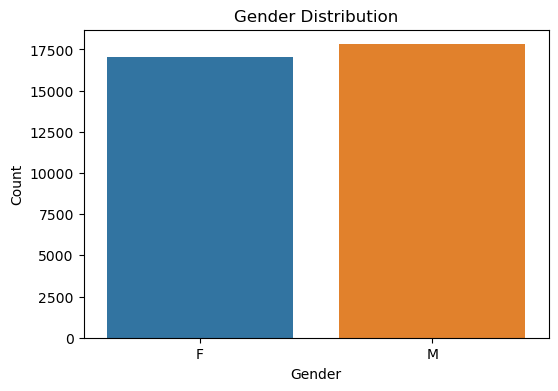

In [56]:
gender_counts = df2['Customer Gender'].value_counts()
plt.figure(figsize=(6, 4))
sns.countplot(x='Customer Gender', data=df2)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

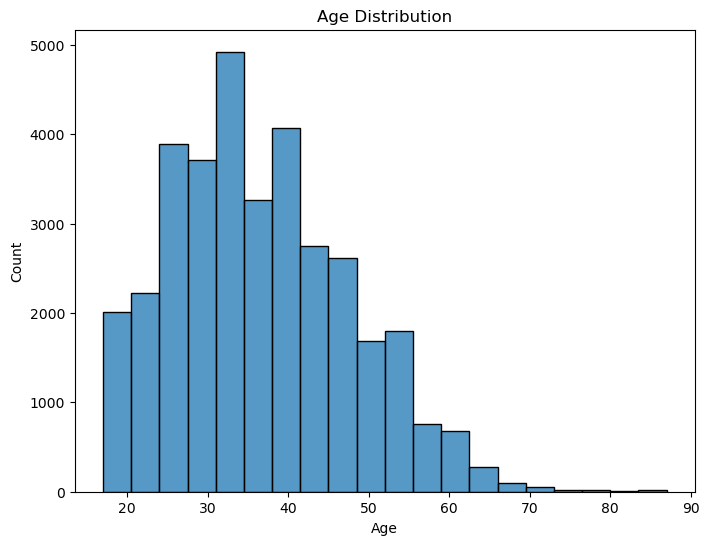

In [57]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df2, x='Customer Age', bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

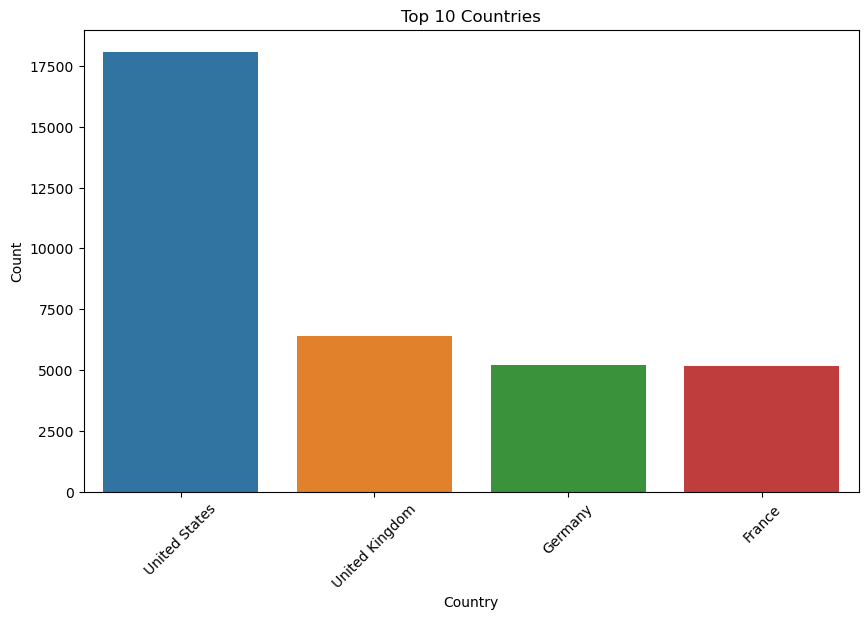

In [58]:
country_counts = df2['Country'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=country_counts.index, y=country_counts.values)
plt.title('Top 10 Countries')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


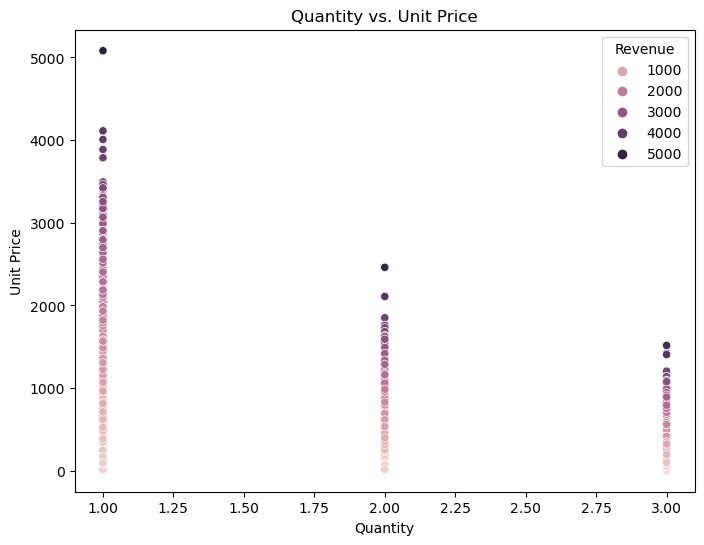

In [83]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df2, x='Quantity', y='Unit Price', hue='Revenue')
plt.title('Quantity vs. Unit Price')
plt.xlabel('Quantity')
plt.ylabel('Unit Price')
plt.show()

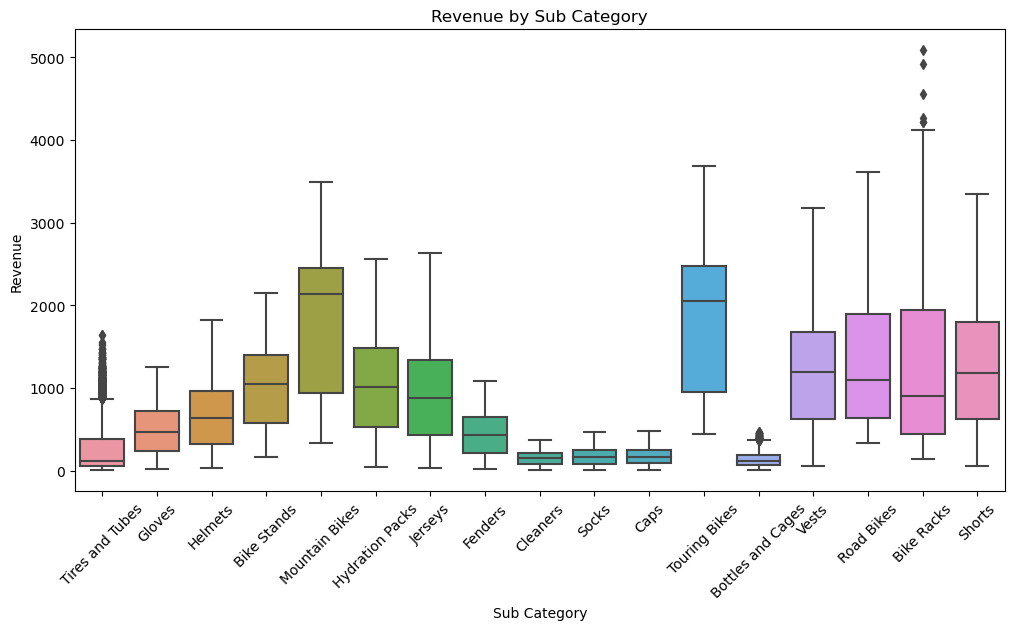

In [60]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Sub Category', y='Revenue', data=df2)
plt.title('Revenue by Sub Category')
plt.xlabel('Sub Category')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.show()

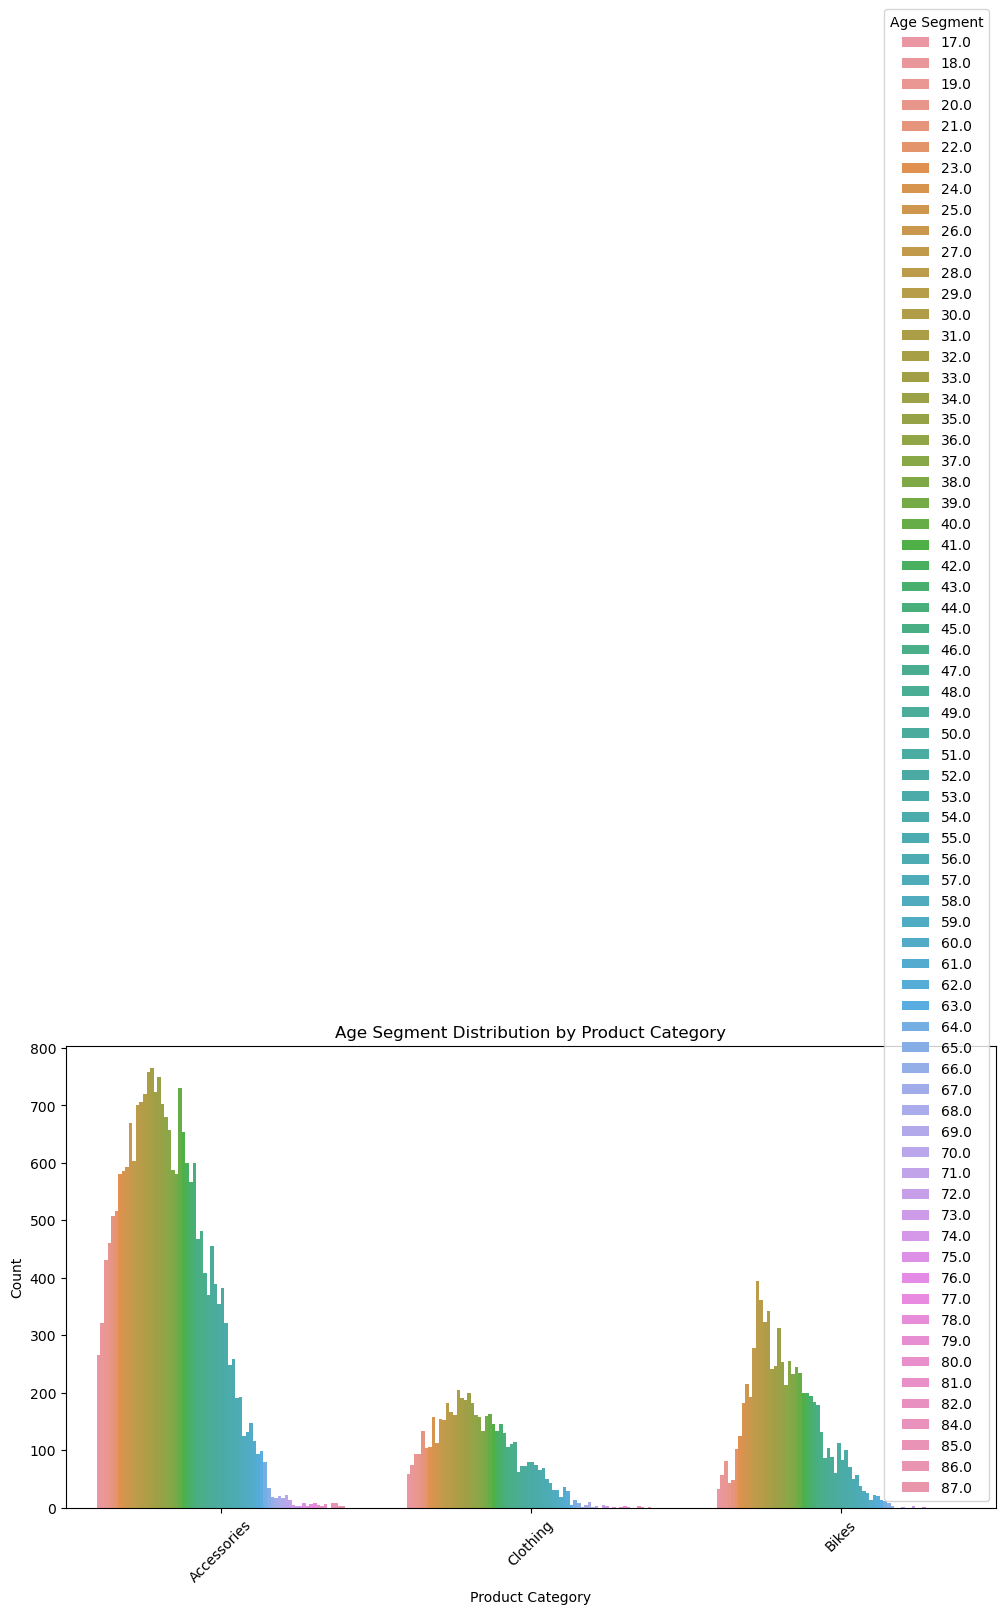

In [61]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Product Category', hue='Customer Age', data=df2)
plt.title('Age Segment Distribution by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.legend(title='Age Segment')
plt.xticks(rotation=45)
plt.show()

In [62]:
age_grouped = df2.groupby('Customer Age').agg({
    'Quantity': 'sum',
    'Revenue': 'sum',
    'Product Category': 'nunique'
}).reset_index()

In [63]:
age_grouped

,Customer Age,Quantity,Revenue,Product Category
0,17.0,731.0,146427.0,3
1,18.0,887.0,227290.0,3
2,19.0,1210.0,291759.0,3
3,20.0,1163.0,247344.0,3
4,21.0,1372.0,297809.0,3
...,...,...,...,...
65,82.0,5.0,974.0,1
66,84.0,19.0,1848.0,2
67,85.0,11.0,2103.0,1
68,86.0,8.0,4383.0,2


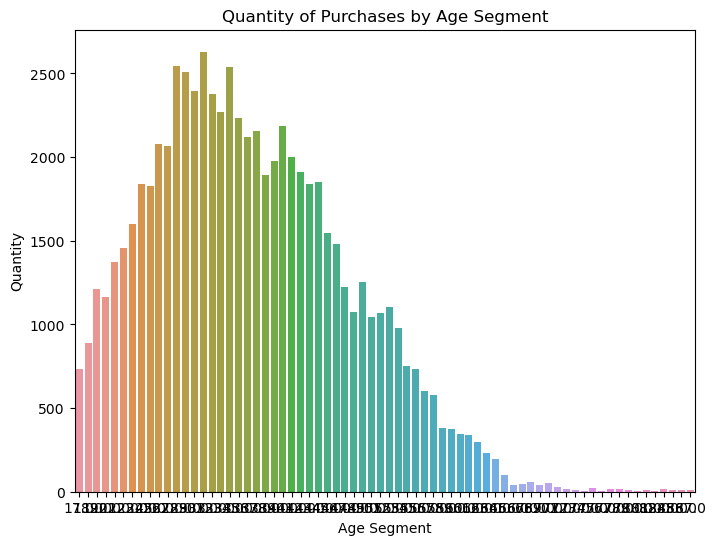

In [64]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Customer Age', y='Quantity', data=age_grouped)
plt.title('Quantity of Purchases by Age Segment')
plt.xlabel('Age Segment')
plt.ylabel('Quantity')
plt.show()


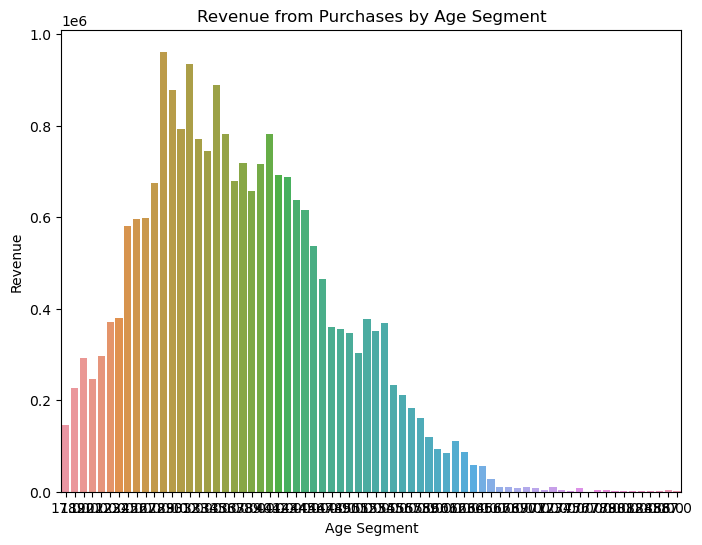

In [65]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Customer Age', y='Revenue', data=age_grouped)
plt.title('Revenue from Purchases by Age Segment')
plt.xlabel('Age Segment')
plt.ylabel('Revenue')
plt.show()

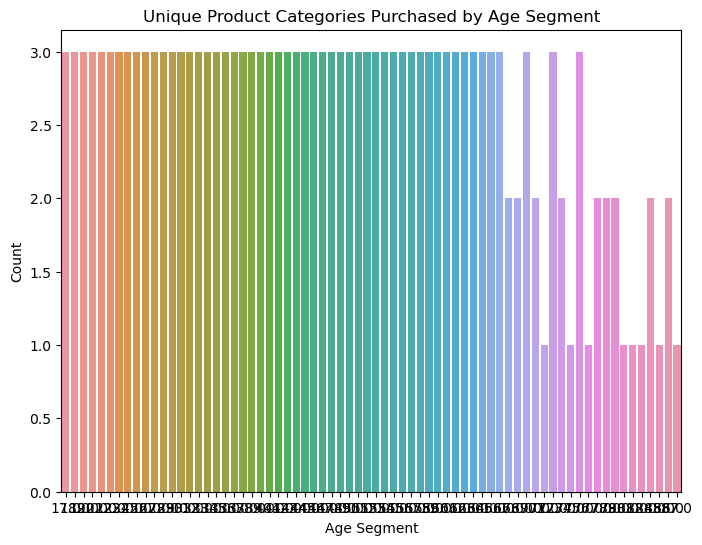

In [66]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Customer Age', y='Product Category', data=age_grouped)
plt.title('Unique Product Categories Purchased by Age Segment')
plt.xlabel('Age Segment')
plt.ylabel('Count')
plt.show()

In [69]:
sub_category_grouped = df2.groupby('Sub Category').agg({
    'Quantity': 'sum',
    'Revenue': 'sum',
}).reset_index()

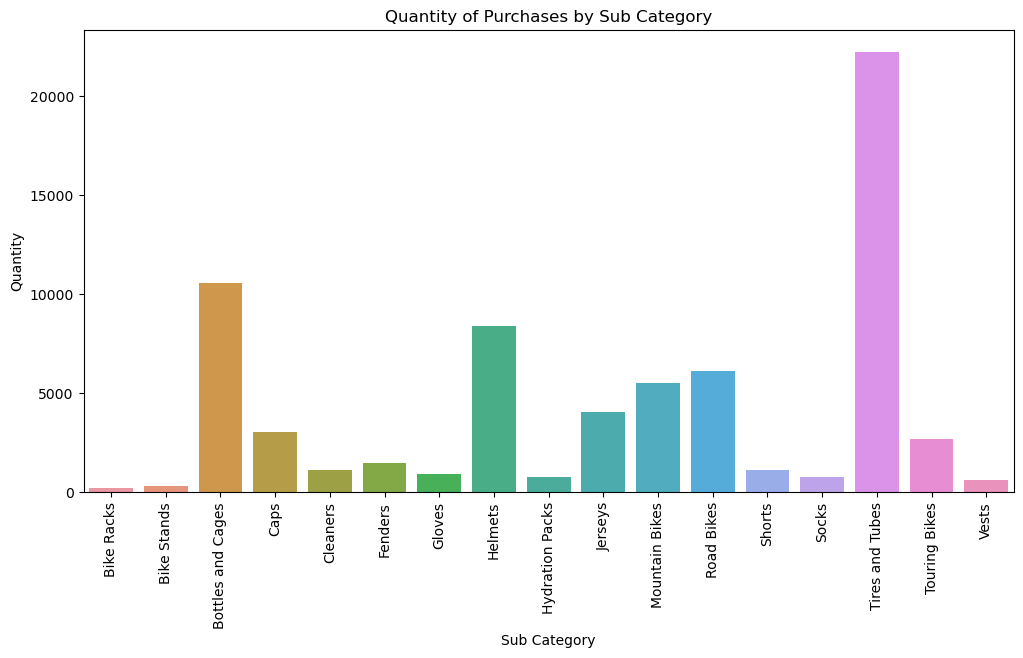

In [70]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Sub Category', y='Quantity', data=sub_category_grouped)
plt.title('Quantity of Purchases by Sub Category')
plt.xlabel('Sub Category')
plt.ylabel('Quantity')
plt.xticks(rotation=90)
plt.show()

In [74]:
sub_category_grouped

,Sub Category,Quantity,Revenue
0,Bike Racks,204.0,140854.0
1,Bike Stands,304.0,150911.0
2,Bottles and Cages,10558.0,709407.0
3,Caps,3020.0,255992.0
4,Cleaners,1102.0,82887.0
5,Fenders,1494.0,329204.0
6,Gloves,913.0,228353.0
7,Helmets,8387.0,2738210.0
8,Hydration Packs,786.0,403276.0
9,Jerseys,4033.0,1834110.0


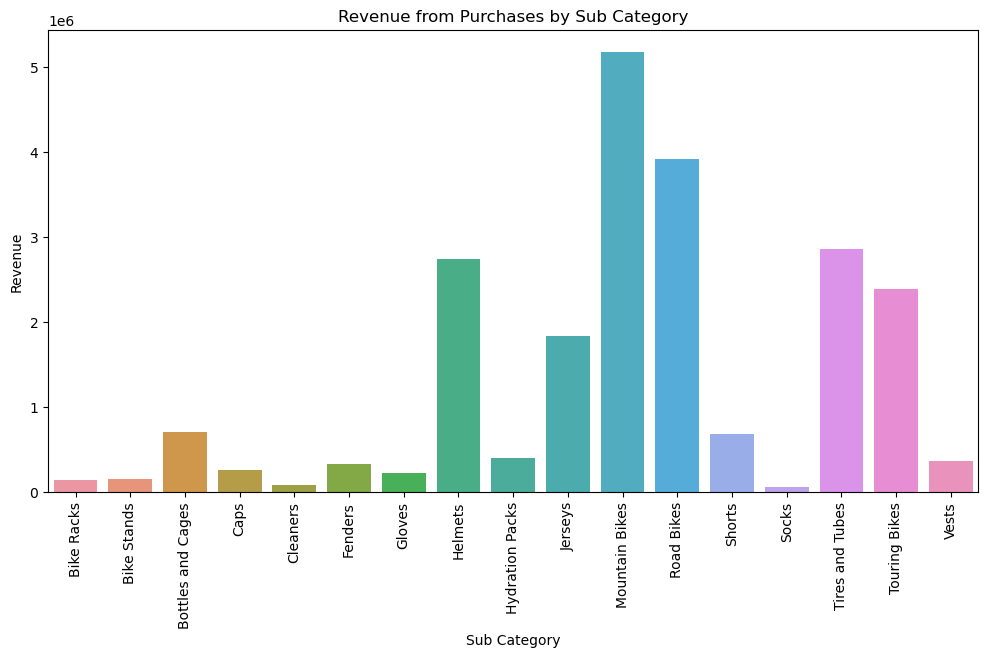

In [71]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Sub Category', y='Revenue', data=sub_category_grouped)
plt.title('Revenue from Purchases by Sub Category')
plt.xlabel('Sub Category')
plt.ylabel('Revenue')
plt.xticks(rotation=90)
plt.show()

In [73]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Sub Category', y='Product Category', data=sub_category_grouped)
plt.title('Number of Unique Customers Purchasing by Sub Category')
plt.xlabel('Sub Category')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

ValueError: Could not interpret input 'Product Category'

<Figure size 1200x600 with 0 Axes>

In [76]:
customer_revenue = df2.groupby(['Customer Age', 'Customer Gender', 'State', 'Country'])['Revenue'].sum().reset_index()

In [77]:
sorted_customers = customer_revenue.sort_values('Revenue', ascending=False)

In [78]:
top_10_customers = sorted_customers.head(10)
bottom_10_customers = sorted_customers.tail(10)

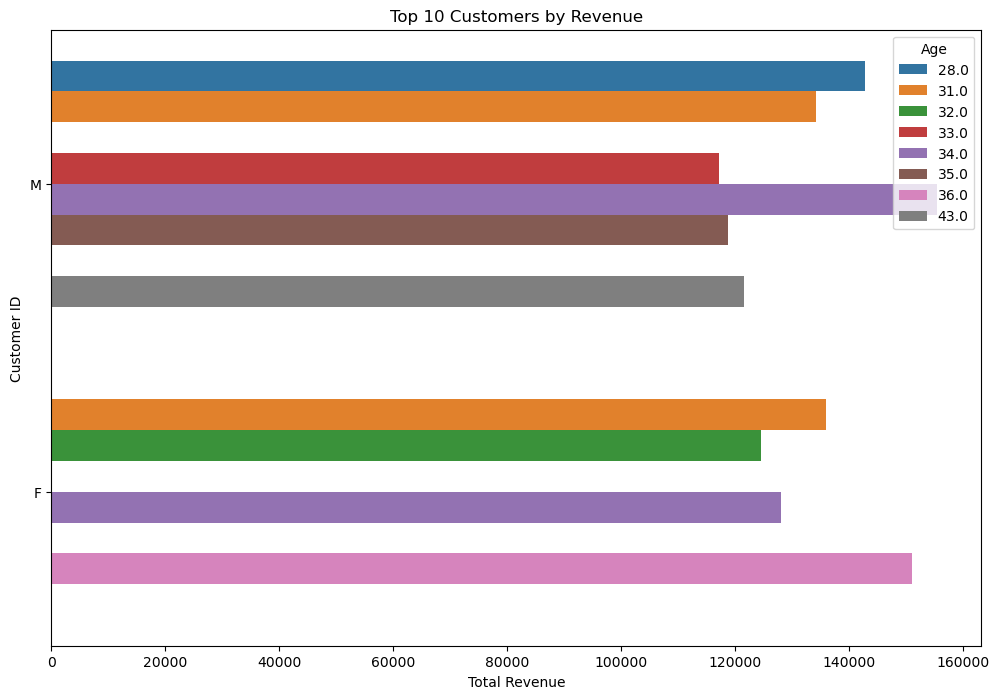

In [80]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Revenue', y='Customer Gender', hue='Customer Age', data=top_10_customers)
plt.title('Top 10 Customers by Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Customer ID')
plt.legend(title='Age')
plt.show()

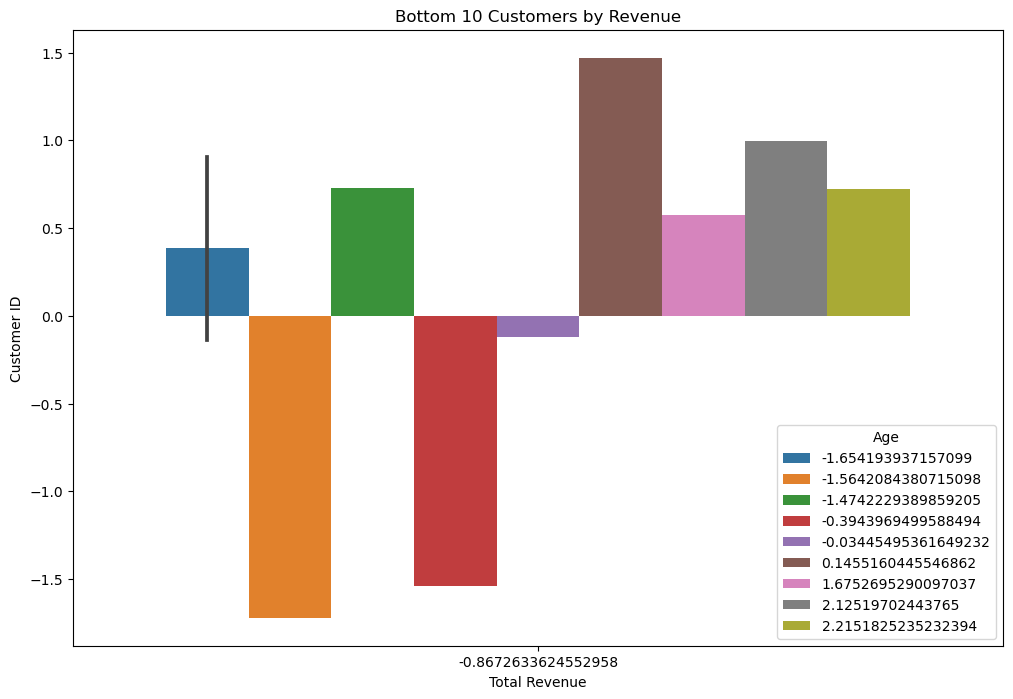

In [48]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Revenue', y='Customer_ID', hue='Customer Age', data=bottom_10_customers)
plt.title('Bottom 10 Customers by Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Customer ID')
plt.legend(title='Age')
plt.show()

In [81]:
purchase_preferences = df2.groupby(['Sub Category', 'Customer Gender', 'Country', 'State'])['Quantity'].sum().reset_index()
sorted_preferences = purchase_preferences.sort_values('Quantity', ascending=False)

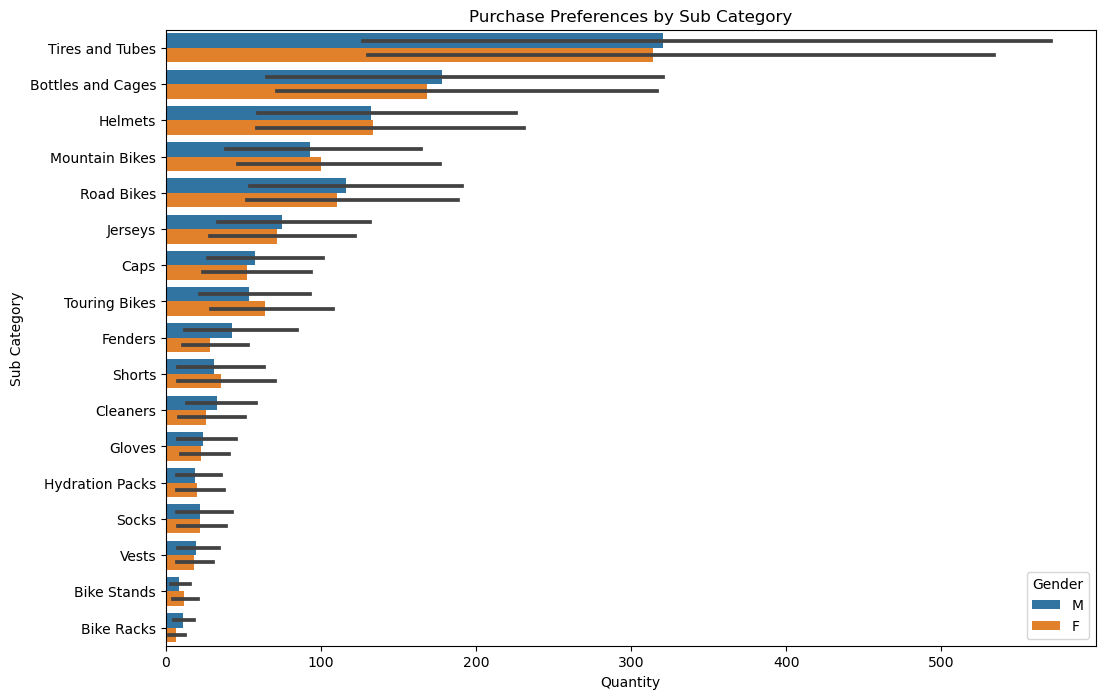

In [82]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Quantity', y='Sub Category', hue='Customer Gender', data=sorted_preferences)
plt.title('Purchase Preferences by Sub Category')
plt.xlabel('Quantity')
plt.ylabel('Sub Category')
plt.legend(title='Gender')
plt.show()

> Generate viz for purchase preference by age

In [84]:
# Step 1: Data Preprocessing
# Load the dataset into a DataFrame and perform necessary data cleaning and encoding.
# (Assuming this step has been completed and the DataFrame is named 'df')

# Step 2: Customer Segmentation
from sklearn.cluster import AgglomerativeClustering

# Select relevant features for segmentation
features = ['Customer Age', 'Customer Gender', 'Product Category']

# Apply Agglomerative Clustering to segment customers
clustering_model = AgglomerativeClustering(n_clusters=9)  # Choose the desired number of clusters
customer_labels = clustering_model.fit_predict(df[features])
df['Cluster'] = customer_labels

# Step 3: Recommender System
def generate_recommendations(customer_id):
    target_customer = df.loc[df['Customer_ID'] == customer_id]
    target_cluster = target_customer['Cluster'].values[0]
    
    cluster_customers = df.loc[df['Cluster'] == target_cluster]
    popular_subcategories = cluster_customers['Sub Category'].value_counts().index.tolist()
    
    # Generate recommendations based on popular subcategories within the cluster
    recommendations = popular_subcategories[:5]  # Select the top 5 subcategories
    
    return recommendations

# Step 4: Testing and Evaluation
from sklearn.model_selection import train_test_split

# Split the dataset into train, validate, and test sets
train, test = train_test_split(df, test_size=0.2, random_state=42)
train, validate = train_test_split(train, test_size=0.25, random_state=42)

# Evaluate the quality of recommendations on the test set
test_customer_ids = test['Customer_ID'].unique()

for customer_id in test_customer_ids:
    recommendations = generate_recommendations(customer_id)
    actual_purchases = test.loc[test['Customer_ID'] == customer_id, 'Sub Category'].tolist()
    
    precision = len(set(recommendations) & set(actual_purchases)) / len(recommendations)
    recall = len(set(recommendations) & set(actual_purchases)) / len(actual_purchases)
    
    print(f"Customer {customer_id}:")
    print(f"Recommendations: {recommendations}")
    print(f"Actual Purchases: {actual_purchases}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print()

Customer 1.6891550231832944:
Recommendations: [1.0010604458474852, -1.6026351569612636, -0.517761989124285, -0.9517112562590765, -1.1686858898264723]
Actual Purchases: [-1.6026351569612636]
Precision: 0.2
Recall: 1.0

Customer 1.2156372253130134:
Recommendations: [1.0010604458474852, -1.6026351569612636, -0.517761989124285, -0.9517112562590765, -1.1686858898264723]
Actual Purchases: [-1.6026351569612636]
Precision: 0.2
Recall: 1.0

Customer -0.7438084334359752:
Recommendations: [1.0010604458474852, -1.6026351569612636, -0.517761989124285, -0.9517112562590765, -1.1686858898264723]
Actual Purchases: [-0.9517112562590765]
Precision: 0.2
Recall: 1.0

Customer -1.6926323884635:
Recommendations: [1.0010604458474852, -1.6026351569612636, -0.517761989124285, -0.9517112562590765, -1.1686858898264723]
Actual Purchases: [1.0010604458474852]
Precision: 0.2
Recall: 1.0

Customer 1.050412697856388:
Recommendations: [-0.08381272198949351, -1.385660523393868, 0.5671111787126937, -0.7347366226916807, 0

Customer -0.12444000038449997:
Recommendations: [1.0010604458474852, -1.6026351569612636, -0.517761989124285, -0.9517112562590765, -1.1686858898264723]
Actual Purchases: [1.0010604458474852]
Precision: 0.2
Recall: 1.0

Customer -1.5540345437238772:
Recommendations: [1.0010604458474852, -1.6026351569612636, -0.517761989124285, -0.9517112562590765, -1.1686858898264723]
Actual Purchases: [1.0010604458474852]
Precision: 0.2
Recall: 1.0

Customer -0.5605016065222806:
Recommendations: [0.35013654514529796, 0.13316191157790222, 1.2180350794148809, -0.08381272198949351, -1.385660523393868]
Actual Purchases: [0.35013654514529796]
Precision: 0.2
Recall: 1.0

Customer 1.3800669264198777:
Recommendations: [1.0010604458474852, -1.6026351569612636, -0.517761989124285, -0.9517112562590765, -1.1686858898264723]
Actual Purchases: [-0.517761989124285]
Precision: 0.2
Recall: 1.0

Customer 1.5222414897334262:
Recommendations: [-0.08381272198949351, -1.385660523393868, 0.5671111787126937, -0.73473662269168

Customer 0.2560831145637115:
Recommendations: [0.35013654514529796, 0.13316191157790222, 1.2180350794148809]
Actual Purchases: [0.35013654514529796]
Precision: 0.3333333333333333
Recall: 1.0

Customer 0.40203310303862605:
Recommendations: [0.35013654514529796, 0.13316191157790222, 1.2180350794148809, -0.08381272198949351, -1.385660523393868]
Actual Purchases: [0.35013654514529796]
Precision: 0.2
Recall: 1.0

Customer -1.2873703033789687:
Recommendations: [1.0010604458474852, -1.6026351569612636, -0.517761989124285, -0.9517112562590765, -1.1686858898264723]
Actual Purchases: [1.0010604458474852]
Precision: 0.2
Recall: 1.0

Customer 0.7891135353723681:
Recommendations: [0.35013654514529796, 0.13316191157790222, 1.2180350794148809, -0.08381272198949351, -1.385660523393868]
Actual Purchases: [0.35013654514529796]
Precision: 0.2
Recall: 1.0

Customer 0.5705362891880168:
Recommendations: [1.0010604458474852, -1.6026351569612636, -0.517761989124285, -0.9517112562590765, -1.1686858898264723]
A

Customer -0.9090329608926008:
Recommendations: [-0.08381272198949351, 0.13316191157790222, 0.35013654514529796, -1.385660523393868, 0.5671111787126937]
Actual Purchases: [-0.08381272198949351]
Precision: 0.2
Recall: 1.0

Customer -1.1211522429851417:
Recommendations: [1.0010604458474852, -1.6026351569612636, -0.517761989124285, -0.9517112562590765, -1.1686858898264723]
Actual Purchases: [1.0010604458474852]
Precision: 0.2
Recall: 1.0

Customer -0.682606804504357:
Recommendations: [0.35013654514529796, 0.13316191157790222, 1.2180350794148809, -0.08381272198949351, -1.385660523393868]
Actual Purchases: [0.13316191157790222]
Precision: 0.2
Recall: 1.0

Customer 1.2425619679111768:
Recommendations: [-0.08381272198949351, 0.13316191157790222, -1.385660523393868, 0.35013654514529796, 1.2180350794148809]
Actual Purchases: [0.35013654514529796]
Precision: 0.2
Recall: 1.0

Customer -0.5653699179145685:
Recommendations: [1.0010604458474852, -1.6026351569612636, -0.517761989124285, -0.95171125625

Customer -0.14739061123385686:
Recommendations: [0.35013654514529796, 0.13316191157790222, 1.2180350794148809, -0.08381272198949351, -1.385660523393868]
Actual Purchases: [0.13316191157790222]
Precision: 0.2
Recall: 1.0

Customer -0.40908718689275736:
Recommendations: [-0.08381272198949351, 0.13316191157790222, -1.385660523393868, 0.35013654514529796, 1.2180350794148809]
Actual Purchases: [-0.08381272198949351]
Precision: 0.2
Recall: 1.0

Customer 0.3674581568240105:
Recommendations: [1.0010604458474852, -1.6026351569612636, -0.517761989124285, -0.9517112562590765, -1.1686858898264723]
Actual Purchases: [-1.6026351569612636]
Precision: 0.2
Recall: 1.0

Customer -1.1651657521031724:
Recommendations: [1.0010604458474852, -1.6026351569612636, -0.517761989124285, -0.9517112562590765, -1.1686858898264723]
Actual Purchases: [-0.517761989124285]
Precision: 0.2
Recall: 1.0

Customer 0.10605964104627043:
Recommendations: [1.0010604458474852, -1.6026351569612636, -0.517761989124285, -0.951711256

Customer 1.1435067340721776:
Recommendations: [1.0010604458474852, -1.6026351569612636, -0.517761989124285, -0.9517112562590765, -1.1686858898264723]
Actual Purchases: [1.0010604458474852]
Precision: 0.2
Recall: 1.0

Customer 1.4265642678809125:
Recommendations: [1.0010604458474852, -1.6026351569612636, -0.517761989124285, -0.9517112562590765, -1.1686858898264723]
Actual Purchases: [1.0010604458474852]
Precision: 0.2
Recall: 1.0

Customer -1.1716237161949827:
Recommendations: [1.0010604458474852, -1.6026351569612636, -0.517761989124285, -0.9517112562590765, -1.1686858898264723]
Actual Purchases: [1.0010604458474852]
Precision: 0.2
Recall: 1.0

Customer -0.06651703014564689:
Recommendations: [1.0010604458474852, -1.6026351569612636, -0.517761989124285, -0.9517112562590765, -1.1686858898264723]
Actual Purchases: [-1.6026351569612636]
Precision: 0.2
Recall: 1.0

Customer -1.4120586869977692:
Recommendations: [1.0010604458474852, -1.6026351569612636, -0.517761989124285, -0.9517112562590765

Customer -1.1006854644787887:
Recommendations: [1.0010604458474852, -1.6026351569612636, -0.517761989124285, -0.9517112562590765, -1.1686858898264723]
Actual Purchases: [-0.517761989124285]
Precision: 0.2
Recall: 1.0

Customer 1.3202562436003416:
Recommendations: [1.0010604458474852, -1.6026351569612636, -0.517761989124285, -0.9517112562590765, -1.1686858898264723]
Actual Purchases: [1.0010604458474852]
Precision: 0.2
Recall: 1.0

Customer -1.316878231613856:
Recommendations: [1.0010604458474852, -1.6026351569612636, -0.517761989124285, -0.9517112562590765, -1.1686858898264723]
Actual Purchases: [-0.517761989124285]
Precision: 0.2
Recall: 1.0

Customer 1.3220446028873045:
Recommendations: [1.0010604458474852, -1.6026351569612636, -0.517761989124285, -0.9517112562590765, -1.1686858898264723]
Actual Purchases: [-0.30078735555688924]
Precision: 0.0
Recall: 0.0

Customer -1.23838912957493:
Recommendations: [1.0010604458474852, -1.6026351569612636, -0.517761989124285, -0.9517112562590765, -

Customer 1.6604419212981683:
Recommendations: [1.0010604458474852, -1.6026351569612636, -0.517761989124285, -0.9517112562590765, -1.1686858898264723]
Actual Purchases: [1.0010604458474852]
Precision: 0.2
Recall: 1.0

Customer -0.28350462363047557:
Recommendations: [1.0010604458474852, -1.6026351569612636, -0.517761989124285, -0.9517112562590765, -1.1686858898264723]
Actual Purchases: [-0.9517112562590765]
Precision: 0.2
Recall: 1.0

Customer 0.2405840007433666:
Recommendations: [0.35013654514529796, 0.13316191157790222, 1.2180350794148809, -0.08381272198949351, -1.385660523393868]
Actual Purchases: [0.13316191157790222]
Precision: 0.2
Recall: 1.0

Customer 0.8638272122499281:
Recommendations: [-0.08381272198949351, -1.385660523393868, 0.5671111787126937, -0.7347366226916807, 0.7840858122800894]
Actual Purchases: [-0.7347366226916807]
Precision: 0.2
Recall: 1.0

Customer 1.1827512850916406:
Recommendations: [-0.08381272198949351, 0.13316191157790222, -1.385660523393868, 0.35013654514529

Customer -0.10029715001050117:
Recommendations: [1.0010604458474852, -1.6026351569612636, -0.517761989124285, -0.9517112562590765, -1.1686858898264723]
Actual Purchases: [-0.30078735555688924]
Precision: 0.0
Recall: 0.0

Customer -0.9719235958174618:
Recommendations: [-0.08381272198949351, 0.13316191157790222, -1.385660523393868, 0.35013654514529796, 1.2180350794148809]
Actual Purchases: [-1.385660523393868]
Precision: 0.2
Recall: 1.0

Customer -0.6264721935524667:
Recommendations: [-0.08381272198949351, 0.13316191157790222, -1.385660523393868, 0.35013654514529796, 1.2180350794148809]
Actual Purchases: [0.13316191157790222]
Precision: 0.2
Recall: 1.0

Customer 0.08449997630899579:
Recommendations: [1.0010604458474852, -1.6026351569612636, -0.517761989124285, -0.9517112562590765, -1.1686858898264723]
Actual Purchases: [-1.6026351569612636]
Precision: 0.2
Recall: 1.0

Customer 1.4299422798673977:
Recommendations: [1.0010604458474852, -1.6026351569612636, -0.517761989124285, -0.9517112562

Customer 0.49612067219161726:
Recommendations: [1.0010604458474852, -1.6026351569612636, -0.517761989124285, -0.9517112562590765, -1.1686858898264723]
Actual Purchases: [1.0010604458474852]
Precision: 0.2
Recall: 1.0

Customer -0.22071334199933468:
Recommendations: [0.35013654514529796, 0.13316191157790222, 1.2180350794148809]
Actual Purchases: [0.35013654514529796]
Precision: 0.3333333333333333
Recall: 1.0

Customer 0.37689671972742567:
Recommendations: [1.0010604458474852, -1.6026351569612636, -0.517761989124285, -0.9517112562590765, -1.1686858898264723]
Actual Purchases: [-1.6026351569612636]
Precision: 0.2
Recall: 1.0

Customer 1.2463373930725428:
Recommendations: [0.35013654514529796, 0.13316191157790222, 1.2180350794148809]
Actual Purchases: [0.35013654514529796]
Precision: 0.3333333333333333
Recall: 1.0

Customer 1.7004812986673925:
Recommendations: [1.0010604458474852, -1.6026351569612636, -0.517761989124285, -0.9517112562590765, -1.1686858898264723]
Actual Purchases: [1.001060

Customer -0.32046404889437496:
Recommendations: [1.0010604458474852, -1.6026351569612636, -0.517761989124285, -0.9517112562590765, -1.1686858898264723]
Actual Purchases: [1.0010604458474852]
Precision: 0.2
Recall: 1.0

Customer 0.7428149004987736:
Recommendations: [1.0010604458474852, -1.6026351569612636, -0.517761989124285, -0.9517112562590765, -1.1686858898264723]
Actual Purchases: [-1.6026351569612636]
Precision: 0.2
Recall: 1.0

Customer 1.7223390232858278:
Recommendations: [1.0010604458474852, -1.6026351569612636, -0.517761989124285, -0.9517112562590765, -1.1686858898264723]
Actual Purchases: [1.0010604458474852]
Precision: 0.2
Recall: 1.0

Customer 1.6800145201610397:
Recommendations: [1.0010604458474852, -1.6026351569612636, -0.517761989124285, -0.9517112562590765, -1.1686858898264723]
Actual Purchases: [1.0010604458474852]
Precision: 0.2
Recall: 1.0

Customer 0.3556351148713115:
Recommendations: [0.35013654514529796, 0.13316191157790222, 1.2180350794148809, -0.08381272198949351

Customer 0.4270701330561063:
Recommendations: [1.0010604458474852, -1.6026351569612636, -0.517761989124285, -0.9517112562590765, -1.1686858898264723]
Actual Purchases: [-0.517761989124285]
Precision: 0.2
Recall: 1.0

Customer -1.5695336575442222:
Recommendations: [1.0010604458474852, -1.6026351569612636, -0.517761989124285, -0.9517112562590765, -1.1686858898264723]
Actual Purchases: [1.0010604458474852]
Precision: 0.2
Recall: 1.0

Customer -1.6101691546757675:
Recommendations: [1.0010604458474852, -1.6026351569612636, -0.517761989124285, -0.9517112562590765, -1.1686858898264723]
Actual Purchases: [-1.6026351569612636]
Precision: 0.2
Recall: 1.0

Customer 1.6514007715696337:
Recommendations: [1.0010604458474852, -1.6026351569612636, -0.517761989124285, -0.9517112562590765, -1.1686858898264723]
Actual Purchases: [-0.517761989124285]
Precision: 0.2
Recall: 1.0

Customer 0.7514586370524275:
Recommendations: [1.0010604458474852, -1.6026351569612636, -0.517761989124285, -0.9517112562590765, 

Customer -0.6580665409554775:
Recommendations: [1.0010604458474852, -1.6026351569612636, -0.517761989124285, -0.9517112562590765, -1.1686858898264723]
Actual Purchases: [1.0010604458474852]
Precision: 0.2
Recall: 1.0

Customer 0.8813133919446762:
Recommendations: [1.0010604458474852, -1.6026351569612636, -0.517761989124285, -0.9517112562590765, -1.1686858898264723]
Actual Purchases: [1.0010604458474852]
Precision: 0.2
Recall: 1.0

Customer 0.12136004827917501:
Recommendations: [1.0010604458474852, -1.6026351569612636, -0.517761989124285, -0.9517112562590765, -1.1686858898264723]
Actual Purchases: [-1.6026351569612636]
Precision: 0.2
Recall: 1.0

Customer 1.2108682672144457:
Recommendations: [1.0010604458474852, -1.6026351569612636, -0.517761989124285, -0.9517112562590765, -1.1686858898264723]
Actual Purchases: [-0.517761989124285]
Precision: 0.2
Recall: 1.0

Customer -0.9729171287546634:
Recommendations: [-0.08381272198949351, 0.13316191157790222, -1.385660523393868, 0.3501365451452979

Customer 0.7510612238775469:
Recommendations: [1.0010604458474852, -1.6026351569612636, -0.517761989124285, -0.9517112562590765, -1.1686858898264723]
Actual Purchases: [1.0010604458474852]
Precision: 0.2
Recall: 1.0

Customer -0.9947748533730986:
Recommendations: [-0.08381272198949351, 0.13316191157790222, 0.35013654514529796, -1.385660523393868, 0.5671111787126937]
Actual Purchases: [0.13316191157790222]
Precision: 0.2
Recall: 1.0

Customer 0.22647583303510394:
Recommendations: [1.0010604458474852, -1.6026351569612636, -0.517761989124285, -0.9517112562590765, -1.1686858898264723]
Actual Purchases: [-1.6026351569612636]
Precision: 0.2
Recall: 1.0

Customer 1.3978511659957862:
Recommendations: [0.35013654514529796, 0.13316191157790222, 1.2180350794148809]
Actual Purchases: [0.13316191157790222]
Precision: 0.3333333333333333
Recall: 1.0

Customer -0.45051751037406396:
Recommendations: [1.0010604458474852, -1.6026351569612636, -0.517761989124285, -0.9517112562590765, -1.1686858898264723]


Customer -1.5068417292068015:
Recommendations: [1.0010604458474852, -1.6026351569612636, -0.517761989124285, -0.9517112562590765, -1.1686858898264723]
Actual Purchases: [-1.6026351569612636]
Precision: 0.2
Recall: 1.0

Customer 0.9297977992801142:
Recommendations: [-0.08381272198949351, -1.385660523393868, 0.5671111787126937, -0.7347366226916807, 0.7840858122800894]
Actual Purchases: [-0.08381272198949351]
Precision: 0.2
Recall: 1.0

Customer -0.6680018703274935:
Recommendations: [1.0010604458474852, -1.6026351569612636, -0.517761989124285, -0.9517112562590765, -1.1686858898264723]
Actual Purchases: [-0.9517112562590765]
Precision: 0.2
Recall: 1.0

Customer -0.5957720257929374:
Recommendations: [0.35013654514529796, 0.13316191157790222, 1.2180350794148809, -0.08381272198949351, -1.385660523393868]
Actual Purchases: [-1.385660523393868]
Precision: 0.2
Recall: 1.0

Customer -0.5383458220226851:
Recommendations: [1.0010604458474852, -1.6026351569612636, -0.517761989124285, -0.951711256259

Customer -0.5485792112758615:
Recommendations: [1.0010604458474852, -1.6026351569612636, -0.517761989124285, -0.9517112562590765, -1.1686858898264723]
Actual Purchases: [1.0010604458474852]
Precision: 0.2
Recall: 1.0

Customer -1.5191615376281011:
Recommendations: [-0.08381272198949351, -1.385660523393868, 0.5671111787126937, -0.7347366226916807, 0.7840858122800894]
Actual Purchases: [-0.08381272198949351]
Precision: 0.2
Recall: 1.0

Customer 1.1551310694374362:
Recommendations: [0.35013654514529796, 0.13316191157790222, 1.2180350794148809, -0.08381272198949351, -1.385660523393868]
Actual Purchases: [1.2180350794148809]
Precision: 0.2
Recall: 1.0

Customer -1.535852890973088:
Recommendations: [1.0010604458474852, -1.6026351569612636, -0.517761989124285, -0.9517112562590765, -1.1686858898264723]
Actual Purchases: [1.0010604458474852]
Precision: 0.2
Recall: 1.0

Customer 0.761692026305604:
Recommendations: [-0.08381272198949351, -1.385660523393868, 0.5671111787126937, -0.7347366226916807

Customer 0.7528495831645098:
Recommendations: [1.0010604458474852, -1.6026351569612636, -0.517761989124285, -0.9517112562590765, -1.1686858898264723]
Actual Purchases: [-1.6026351569612636]
Precision: 0.2
Recall: 1.0

Customer 0.583154157490477:
Recommendations: [1.0010604458474852, -1.6026351569612636, -0.517761989124285, -0.9517112562590765, -1.1686858898264723]
Actual Purchases: [1.0010604458474852]
Precision: 0.2
Recall: 1.0

Customer 0.15543822802518978:
Recommendations: [1.0010604458474852, -1.6026351569612636, -0.517761989124285, -0.9517112562590765, -1.1686858898264723]
Actual Purchases: [-1.6026351569612636]
Precision: 0.2
Recall: 1.0

Customer 0.21266572520800175:
Recommendations: [-0.08381272198949351, -1.385660523393868, 0.5671111787126937, -0.7347366226916807, 0.7840858122800894]
Actual Purchases: [-0.08381272198949351]
Precision: 0.2
Recall: 1.0

Customer 0.31231707880932186:
Recommendations: [1.0010604458474852, -1.6026351569612636, -0.517761989124285, -0.951711256259076

Customer -1.3424120280999372:
Recommendations: [0.35013654514529796, 0.13316191157790222, 1.2180350794148809]
Actual Purchases: [0.13316191157790222]
Precision: 0.3333333333333333
Recall: 1.0

Customer -0.8663110445929321:
Recommendations: [0.35013654514529796, 0.13316191157790222, 1.2180350794148809]
Actual Purchases: [1.2180350794148809]
Precision: 0.3333333333333333
Recall: 1.0

Customer -0.5809683850286336:
Recommendations: [1.0010604458474852, -1.6026351569612636, -0.517761989124285, -0.9517112562590765, -1.1686858898264723]
Actual Purchases: [1.0010604458474852]
Precision: 0.2
Recall: 1.0

Customer -0.9202598830829788:
Recommendations: [0.35013654514529796, 0.13316191157790222, 1.2180350794148809]
Actual Purchases: [0.35013654514529796]
Precision: 0.3333333333333333
Recall: 1.0

Customer -1.3869223036865688:
Recommendations: [1.0010604458474852, -1.6026351569612636, -0.517761989124285, -0.9517112562590765, -1.1686858898264723]
Actual Purchases: [-2.036584424096055]
Precision: 0.0